In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [2]:
df = pd.read_csv("news.csv")

In [3]:
print(df.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [4]:
df = df.dropna() 
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)

In [6]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0
0
0


In [7]:
len(y_train)

14628

In [8]:
len(y_test)

3657

In [9]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

def predict_model(model, X_test):
    return model.predict(X_test)

In [11]:
print("\n🔹 Training Logistic Regression Model...")
log_model = LogisticRegression()
train_time_log = timeit.timeit(lambda: train_model(log_model, X_train_tfidf, y_train), number=1)
predict_time_log = timeit.timeit(lambda: predict_model(log_model, X_test_tfidf), number=1)
y_pred_log = log_model.predict(X_test_tfidf)
y_probs_log = log_model.predict_proba(X_test_tfidf)
y_probs_positive = y_probs_log[:, 1]
y_probs_positive[:10]
fpr_log, tpr_log, threshold = roc_curve(y_test, y_probs_positive)


🔹 Training Logistic Regression Model...


In [12]:
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"✅ Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"⏳ Logistic Regression Training Time: {train_time_log:.4f} seconds")
print(f"⏳ Logistic Regression Prediction Time: {predict_time_log:.4f} seconds")

print("\n🔹 Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log))

✅ Logistic Regression Accuracy: 0.9423
⏳ Logistic Regression Training Time: 0.4493 seconds
⏳ Logistic Regression Prediction Time: 0.0034 seconds

🔹 Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2082
           1       0.94      0.92      0.93      1575

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



In [13]:
plt.style.use('dark_background')

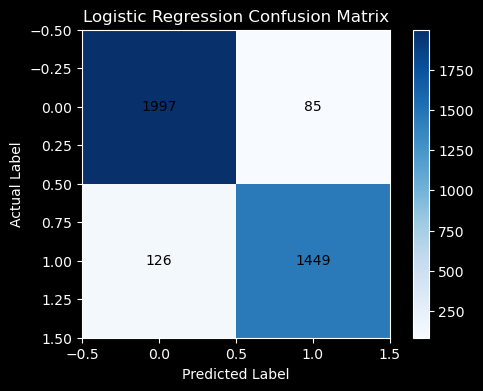

In [14]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()

In [15]:
cv_scores = cross_val_score(log_model, X_train_tfidf, y_train, cv=5) 
print(f"Cross-validation mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation mean accuracy: 0.9462


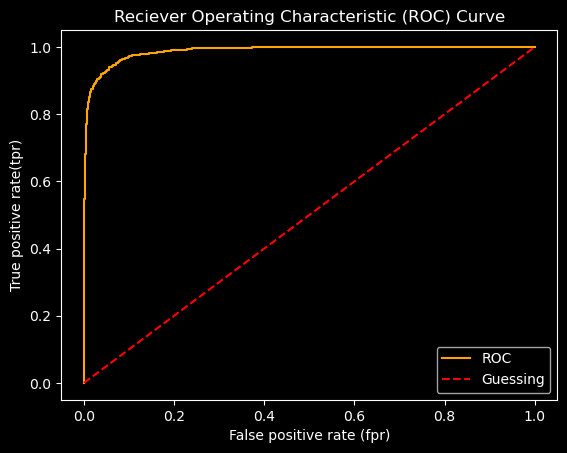

In [16]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="red", linestyle="--", label="Guessing")
 
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr_log, tpr_log)

In [17]:
print("\n🔹 Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_time_rf = timeit.timeit(lambda: train_model(rf_model, X_train_tfidf, y_train), number=1)
predict_time_rf = timeit.timeit(lambda: predict_model(rf_model, X_test_tfidf), number=1)
y_pred_rf = rf_model.predict(X_test_tfidf)
y_probs_rf = rf_model.predict_proba(X_test_tfidf)
y_probs_positive = y_probs_rf[:, 1]
y_probs_positive[:10]
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_probs_positive)


🔹 Training Random Forest Classifier...


In [18]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"⏳ Random Forest Training Time: {train_time_rf:.4f} seconds")
print(f"⏳ Random Forest Prediction Time: {predict_time_rf:.4f} seconds")

print("\n🔹 Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

✅ Random Forest Accuracy: 0.9420
⏳ Random Forest Training Time: 88.8109 seconds
⏳ Random Forest Prediction Time: 0.6931 seconds

🔹 Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2082
           1       0.96      0.90      0.93      1575

    accuracy                           0.94      3657
   macro avg       0.95      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



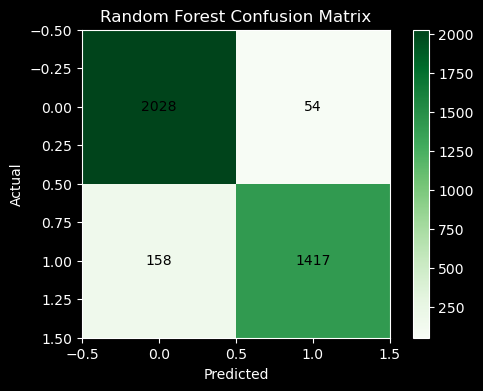

In [19]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Greens')
plt.colorbar()
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()

In [20]:
cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5) 
print(f"Cross-validation mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation mean accuracy: 0.9445


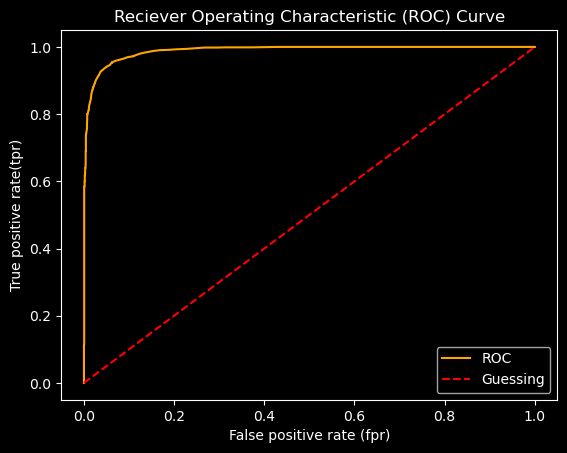

In [21]:
plot_roc_curve(fpr_rf, tpr_rf)

In [22]:
print("\n🔹 Training Naive Bayes Classifier...")
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
y_probs_nb = model.predict_proba(X_test_tfidf)
y_probs_positive = y_probs_nb[:, 1]
y_probs_positive[:10]
fpr_nb, tpr_nb, threshold = roc_curve(y_test, y_probs_positive)


🔹 Training Naive Bayes Classifier...


In [23]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Naive Bayes Accuracy: {accuracy_rf:.4f}")
print(f"⏳ Training Time: {train_time_rf:.4f} seconds")
print(f"⏳ Prediction Time: {predict_time_rf:.4f} seconds")

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_rf))

✅ Naive Bayes Accuracy: 0.9420
⏳ Training Time: 88.8109 seconds
⏳ Prediction Time: 0.6931 seconds

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2082
           1       0.96      0.90      0.93      1575

    accuracy                           0.94      3657
   macro avg       0.95      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



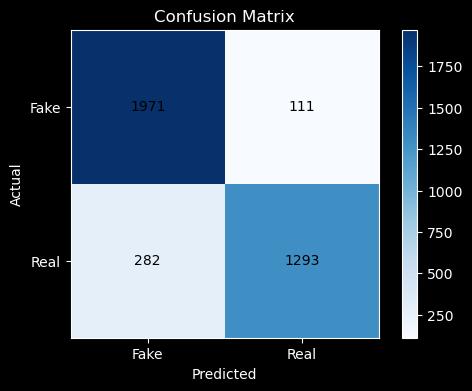

In [24]:
cm = confusion_matrix(y_test, y_pred)
labels = ["Fake", "Real"]
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0, 1], labels=labels)
plt.yticks(ticks=[0, 1], labels=labels)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()

In [25]:
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5) 
print(f"Cross-validation mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation mean accuracy: 0.8921


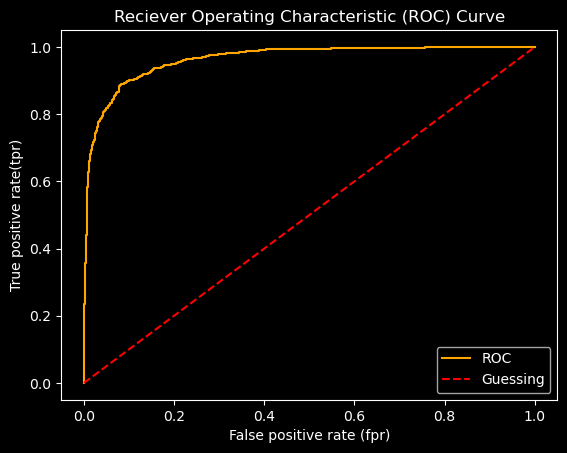

In [26]:
plot_roc_curve(fpr_nb, tpr_nb)

In [27]:
print("\n🔹 Training Linear SVC Model...")
svc_model = LinearSVC()
train_time_svc = timeit.timeit(lambda: svc_model.fit(X_train_tfidf, y_train), number=1)
predict_time_svc = timeit.timeit(lambda: svc_model.predict(X_test_tfidf), number=1)
y_pred_svc = svc_model.predict(X_test_tfidf)
y_scores_svc = svc_model.decision_function(X_test_tfidf)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test, y_scores_svc)


🔹 Training Linear SVC Model...


In [28]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"✅ Linear SVC Accuracy: {accuracy_svc:.4f}")
print(f"⏳ Linear SVC Training Time: {train_time_svc:.4f} seconds")
print(f"⏳ Linear SVC Prediction Time: {predict_time_svc:.4f} seconds")

print("\n🔹 Classification Report - Linear SVC:")
print(classification_report(y_test, y_pred_svc))

✅ Linear SVC Accuracy: 0.9530
⏳ Linear SVC Training Time: 59.7834 seconds
⏳ Linear SVC Prediction Time: 0.0017 seconds

🔹 Classification Report - Linear SVC:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2082
           1       0.95      0.94      0.94      1575

    accuracy                           0.95      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657



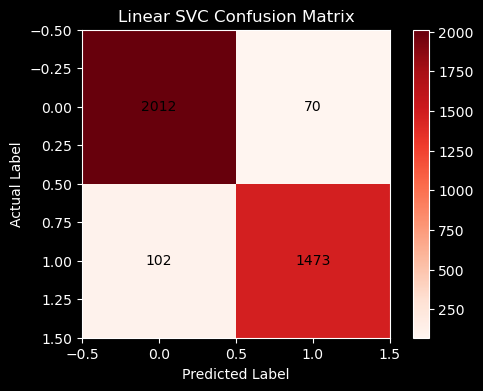

In [29]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 4))
plt.imshow(cm_svc, interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.title("Linear SVC Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
for i in range(cm_svc.shape[0]):
    for j in range(cm_svc.shape[1]):
        plt.text(j, i, str(cm_svc[i, j]), ha='center', va='center', color='black')
plt.show()

In [30]:
cv_scores = cross_val_score(svc_model, X_train_tfidf, y_train, cv=5) 
print(f"Cross-validation mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation mean accuracy: 0.9514


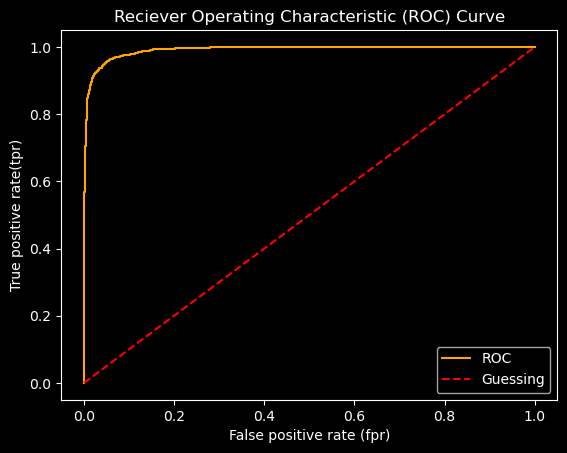

In [31]:
plot_roc_curve(fpr_svc, tpr_svc)

In [32]:
print("\n🔹 Training Stacking Ensemble Model...")
base_classifiers = [
    ('lr', LogisticRegression()), 
    ('nb', MultinomialNB()), 
    ('svc', LinearSVC())
]


🔹 Training Stacking Ensemble Model...


In [33]:
stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())
train_time_stacking = timeit.timeit(lambda: stacking_model.fit(X_train_tfidf, y_train), number=1)
predict_time_stacking = timeit.timeit(lambda: stacking_model.predict(X_test_tfidf), number=1)
y_pred_stacking = stacking_model.predict(X_test_tfidf) 
y_probs_stacking = stacking_model.predict_proba(X_test_tfidf)
y_probs_positive = y_probs_stacking[:, 1]
y_probs_positive[:10]
fpr_stacking, tpr_stacking, threshold = roc_curve(y_test, y_probs_positive)

In [34]:
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"✅ Stacking Ensemble Accuracy: {accuracy_stacking:.4f}")
print(f"⏳ Stacking Ensemble Training Time: {train_time_stacking:.4f} seconds")
print(f"⏳ Stacking Ensemble Prediction Time: {predict_time_stacking:.4f} seconds")

✅ Stacking Ensemble Accuracy: 0.9502
⏳ Stacking Ensemble Training Time: 6.2756 seconds
⏳ Stacking Ensemble Prediction Time: 0.0201 seconds


In [35]:
print("\n🔹 Classification Report - Stacking Ensemble:")
print(classification_report(y_test, y_pred_stacking))


🔹 Classification Report - Stacking Ensemble:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2082
           1       0.95      0.93      0.94      1575

    accuracy                           0.95      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657



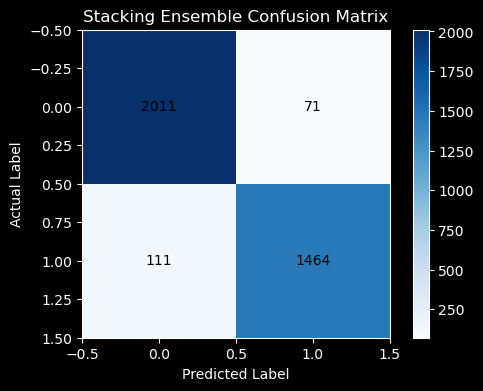

In [36]:
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(6, 4))
plt.imshow(cm_stacking, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.title("Stacking Ensemble Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
for i in range(cm_stacking.shape[0]):
    for j in range(cm_stacking.shape[1]):
        plt.text(j, i, str(cm_stacking[i, j]), ha='center', va='center', color='black')

plt.show()

In [37]:
cv_scores = cross_val_score(stacking_model, X_train_tfidf, y_train, cv=5) 
print(f"Cross-validation mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation mean accuracy: 0.9524


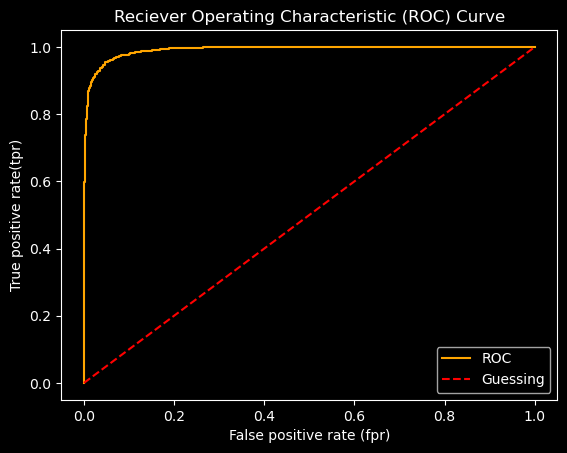

In [38]:
plot_roc_curve(fpr_stacking, tpr_stacking)

In [39]:
print("""
 Naive Bayes Accuracy: 0.9420
 Training Time: 91.9424 seconds
 Prediction Time: 0.7732 seconds
 Cross-validation mean accuracy: 0.8921

 Random Forest Accuracy: 0.9420
 Random Forest Training Time: 91.9424 seconds
 Random Forest Prediction Time: 0.7732 seconds
 Cross-validation mean accuracy: 0.9445

 Logistic Regression Accuracy: 0.9423
 Logistic Regression Training Time: 0.8049 seconds
 Logistic Regression Prediction Time: 0.0051 seconds
 Cross-validation mean accuracy: 0.9462

 Linear SVC Accuracy: 0.9530
 Linear SVC Training Time: 0.8339 seconds
 Linear SVC Prediction Time: 0.0039 seconds
 Cross-validation mean accuracy: 0.9514

 Stacking Ensemble Accuracy: 0.9502
 Stacking Ensemble Training Time: 4.5465 seconds
 Stacking Ensemble Prediction Time: 0.0173 seconds
 Cross-validation mean accuracy: 0.9524
""")



 Naive Bayes Accuracy: 0.9420
 Training Time: 91.9424 seconds
 Prediction Time: 0.7732 seconds
 Cross-validation mean accuracy: 0.8921

 Random Forest Accuracy: 0.9420
 Random Forest Training Time: 91.9424 seconds
 Random Forest Prediction Time: 0.7732 seconds
 Cross-validation mean accuracy: 0.9445

 Logistic Regression Accuracy: 0.9423
 Logistic Regression Training Time: 0.8049 seconds
 Logistic Regression Prediction Time: 0.0051 seconds
 Cross-validation mean accuracy: 0.9462

 Linear SVC Accuracy: 0.9530
 Linear SVC Training Time: 0.8339 seconds
 Linear SVC Prediction Time: 0.0039 seconds
 Cross-validation mean accuracy: 0.9514

 Stacking Ensemble Accuracy: 0.9502
 Stacking Ensemble Training Time: 4.5465 seconds
 Stacking Ensemble Prediction Time: 0.0173 seconds
 Cross-validation mean accuracy: 0.9524



In [40]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round (accuracy, 2),
                   "precision": round (precision, 2),
                   "recall": round (recall, 2),
                   "f1": round (f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%") 
    print (f"Precision: {precision: .2f}") 
    print (f"Recall: {recall:.2f}") 
    print (f"F1 score: {f1:.2f}")
    
    return metric_dict

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
svc_basic_metrics = evaluate_preds(y_test, y_pred_svc)

Acc: 95.30%
Precision:  0.95
Recall: 0.94
F1 score: 0.94


In [42]:
log_metrics = evaluate_preds(y_test, y_pred_log)

Acc: 94.23%
Precision:  0.94
Recall: 0.92
F1 score: 0.93


In [43]:
rf_metrics = evaluate_preds(y_test, y_pred_rf)

Acc: 94.20%
Precision:  0.96
Recall: 0.90
F1 score: 0.93


In [44]:
nb_metrics = evaluate_preds(y_test, y_pred)

Acc: 89.25%
Precision:  0.92
Recall: 0.82
F1 score: 0.87


In [45]:
stacking_metrics = evaluate_preds(y_test, y_pred_stacking)

Acc: 95.02%
Precision:  0.95
Recall: 0.93
F1 score: 0.94


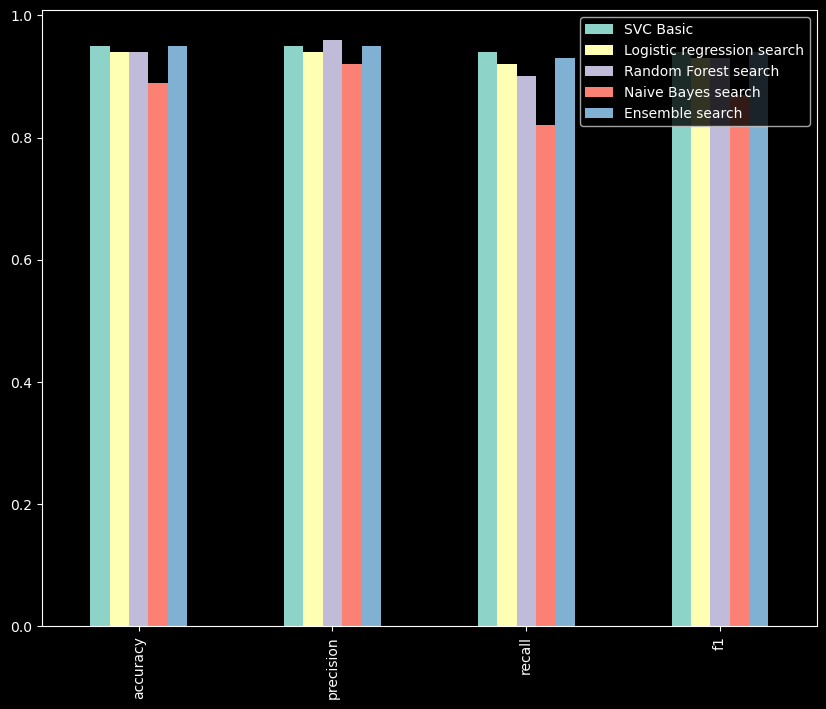

In [46]:
compare_metrics = pd.DataFrame({"SVC Basic": svc_basic_metrics,
                                "Logistic regression search": log_metrics,
                                "Random Forest search": rf_metrics,
                                "Naive Bayes search": nb_metrics,
                                "Ensemble search": stacking_metrics})
compare_metrics.plot.bar(figsize=(10,8));

In [47]:
print(type(stacking_model))

<class 'sklearn.ensemble._stacking.StackingClassifier'>


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [49]:
print(tfidf_vectorizer)

TfidfVectorizer(max_features=5000, stop_words='english')


In [50]:
from joblib import dump

dump((svc_model, tfidf_vectorizer), "SVC_models.joblib")

['SVC_models.joblib']

In [51]:
from joblib import load

loaded_model, loaded_vectorizer = load("SVC_models.joblib")

X_test_tfidf = loaded_vectorizer.transform(X_test)

pickle_y_preds = loaded_model.predict(X_test_tfidf)

print(evaluate_preds(y_test, pickle_y_preds))

Acc: 95.30%
Precision:  0.95
Recall: 0.94
F1 score: 0.94
{'accuracy': 0.95, 'precision': 0.95, 'recall': 0.94, 'f1': 0.94}


In [52]:
data = {
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Linear SVC', 'Stacking Ensemble'],
    'Accuracy': [0.9420, 0.9420, 0.9423, 0.9530, 0.9502],
    'Training Time (seconds)': [91.9424, 91.9424, 0.8049, 0.8339, 4.5465],
    'Prediction Time (seconds)': [0.7732, 0.7732, 0.0051, 0.0039, 0.0173],
    'Cross-validation Mean Accuracy': [0.8921, 0.9445, 0.9462, 0.9514, 0.9524]
}
df = pd.DataFrame(data)

In [53]:
styled_df = df.style \
    .background_gradient(cmap='Blues', subset=['Accuracy', 'Cross-validation Mean Accuracy']) \
    .background_gradient(cmap='Reds', subset=['Training Time (seconds)', 'Prediction Time (seconds)']) \
    .set_caption("Comparative Study of Machine Learning Models for Fake News Detection") \
    .set_properties(**{'text-align': 'left', 'font-size': '12pt', 'padding': '12px'}) \
    .format({
        'Accuracy': '{:.4f}',
        'Training Time (seconds)': '{:.4f}',
        'Prediction Time (seconds)': '{:.4f}',
        'Cross-validation Mean Accuracy': '{:.4f}'
    })
styled_df

,Model,Accuracy,Training Time (seconds),Prediction Time (seconds),Cross-validation Mean Accuracy
0,Naive Bayes,0.9420,91.9424,0.7732,0.8921
1,Random Forest,0.9420,91.9424,0.7732,0.9445
2,Logistic Regression,0.9423,0.8049,0.0051,0.9462
3,Linear SVC,0.9530,0.8339,0.0039,0.9514
4,Stacking Ensemble,0.9502,4.5465,0.0173,0.9524


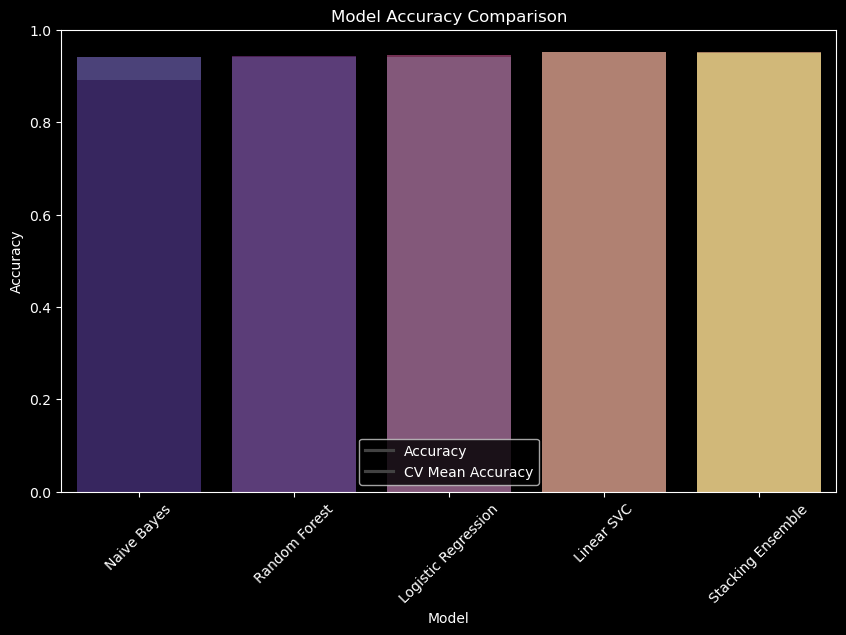

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Model', data=df, palette='viridis', legend=False)
sns.barplot(x='Model', y='Cross-validation Mean Accuracy', hue='Model', data=df, palette='magma', alpha=0.7, legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(['Accuracy', 'CV Mean Accuracy'])
plt.show()

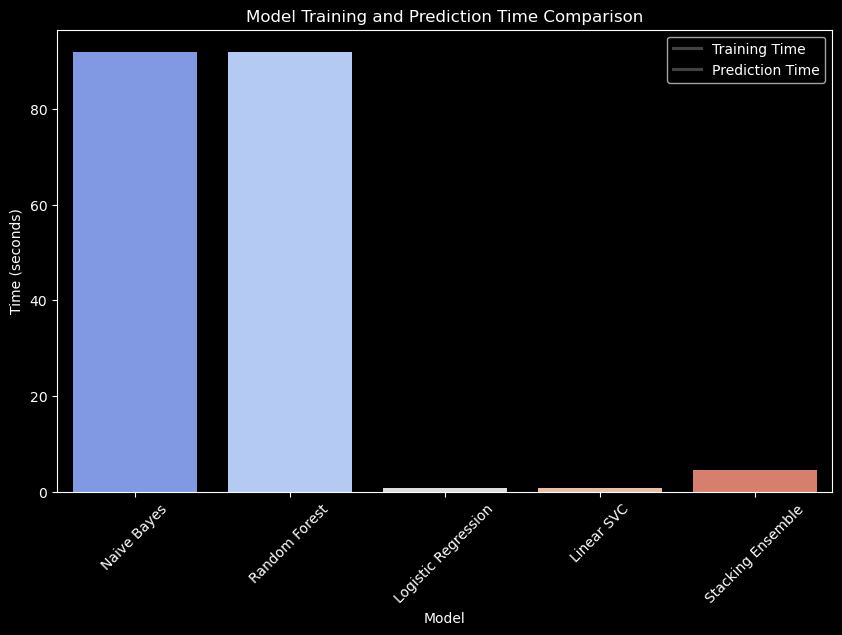

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', hue='Model', data=df, palette='coolwarm', legend=False)
sns.barplot(x='Model', y='Prediction Time (seconds)', hue='Model', data=df, palette='coolwarm', alpha=0.7, legend=False)
plt.title('Model Training and Prediction Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.legend(['Training Time', 'Prediction Time'])
plt.show()

In [56]:
df

,Model,Accuracy,Training Time (seconds),Prediction Time (seconds),Cross-validation Mean Accuracy
0,Naive Bayes,0.9420,91.9424,0.7732,0.8921
1,Random Forest,0.9420,91.9424,0.7732,0.9445
2,Logistic Regression,0.9423,0.8049,0.0051,0.9462
3,Linear SVC,0.9530,0.8339,0.0039,0.9514
4,Stacking Ensemble,0.9502,4.5465,0.0173,0.9524


In [57]:
compare_metrics = compare_metrics.T.reset_index()
compare_metrics.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']


df = pd.DataFrame(compare_metrics)


styled_df = df.style \
    .background_gradient(cmap='Blues', subset=['Accuracy', 'Precision', 'Recall', 'F1']) \
    .set_caption("Comparative Study of Machine Learning Models for Fake News Detection") \
    .set_properties(**{'text-align': 'left', 'font-size': '12pt', 'padding': '12px'}) \
    .format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1': '{:.4f}'
    })


styled_df

,Model,Accuracy,Precision,Recall,F1
0,SVC Basic,0.9500,0.9500,0.9400,0.9400
1,Logistic regression search,0.9400,0.9400,0.9200,0.9300
2,Random Forest search,0.9400,0.9600,0.9000,0.9300
3,Naive Bayes search,0.8900,0.9200,0.8200,0.8700
4,Ensemble search,0.9500,0.9500,0.9300,0.9400


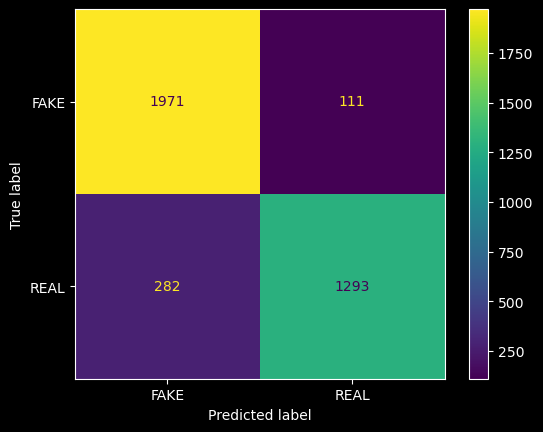

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FAKE", "REAL"])
disp.plot()


In [59]:
from joblib import dump

dump((log_model, tfidf_vectorizer), "Logistic_models.joblib")

['Logistic_models.joblib']